## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0   0.249234   166.962755  0.881578  2.027324  1.604406
1  69.497302  1596.495928  0.146110  5.997399  1.308032
2  69.441670  1518.305601  0.822523  5.373095  1.627686
3  24.453413   559.180106  0.307561  8.352835  1.273187
4  44.879766  1240.451063  0.316243  7.864155  1.445988


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0641769	total: 67ms	remaining: 1m 6s
1:	learn: 1.0559076	total: 67.6ms	remaining: 33.7s
2:	learn: 1.0469485	total: 68ms	remaining: 22.6s
3:	learn: 1.0372875	total: 68.5ms	remaining: 17.1s
4:	learn: 1.0273431	total: 69ms	remaining: 13.7s
5:	learn: 1.0191939	total: 69.5ms	remaining: 11.5s
6:	learn: 1.0086722	total: 70.1ms	remaining: 9.94s
7:	learn: 0.9988583	total: 70.5ms	remaining: 8.74s
8:	learn: 0.9892823	total: 70.9ms	remaining: 7.8s
9:	learn: 0.9798436	total: 71.3ms	remaining: 7.06s
10:	learn: 0.9699296	total: 71.9ms	remaining: 6.46s
11:	learn: 0.9592871	total: 72.3ms	remaining: 5.95s
12:	learn: 0.9513683	total: 72.6ms	remaining: 5.51s
13:	learn: 0.9428621	total: 73.1ms	remaining: 5.15s
14:	learn: 0.9339040	total: 73.5ms	remaining: 4.83s
15:	learn: 0.9251271	total: 73.9ms	remaining: 4.54s
16:	learn: 0.9152442	total: 74.3ms	remaining: 4.29s
17:	learn: 0.9079257	total: 74.8ms	remaining: 4.08s
18:	learn: 0.9013637	total: 75.3ms	remaining: 3.88s

93:	learn: 0.5082548	total: 109ms	remaining: 1.05s
94:	learn: 0.5043360	total: 110ms	remaining: 1.04s
95:	learn: 0.5013168	total: 110ms	remaining: 1.04s
96:	learn: 0.4979356	total: 110ms	remaining: 1.03s
97:	learn: 0.4944672	total: 111ms	remaining: 1.02s
98:	learn: 0.4922506	total: 111ms	remaining: 1.01s
99:	learn: 0.4894255	total: 112ms	remaining: 1.01s
100:	learn: 0.4874020	total: 112ms	remaining: 1s
101:	learn: 0.4846784	total: 113ms	remaining: 993ms
102:	learn: 0.4818659	total: 113ms	remaining: 986ms
103:	learn: 0.4787696	total: 114ms	remaining: 978ms
104:	learn: 0.4762167	total: 114ms	remaining: 972ms
105:	learn: 0.4723748	total: 115ms	remaining: 966ms
106:	learn: 0.4695778	total: 115ms	remaining: 960ms
107:	learn: 0.4668912	total: 115ms	remaining: 953ms
108:	learn: 0.4639453	total: 116ms	remaining: 948ms
109:	learn: 0.4616172	total: 116ms	remaining: 940ms
110:	learn: 0.4579558	total: 117ms	remaining: 936ms
111:	learn: 0.4543160	total: 117ms	remaining: 930ms
112:	learn: 0.4518051	

272:	learn: 0.2315474	total: 187ms	remaining: 497ms
273:	learn: 0.2310490	total: 187ms	remaining: 496ms
274:	learn: 0.2305241	total: 188ms	remaining: 494ms
275:	learn: 0.2292993	total: 188ms	remaining: 493ms
276:	learn: 0.2281941	total: 188ms	remaining: 491ms
277:	learn: 0.2277671	total: 189ms	remaining: 490ms
278:	learn: 0.2272511	total: 189ms	remaining: 489ms
279:	learn: 0.2258004	total: 189ms	remaining: 487ms
280:	learn: 0.2249144	total: 190ms	remaining: 486ms
281:	learn: 0.2244013	total: 190ms	remaining: 484ms
282:	learn: 0.2239598	total: 191ms	remaining: 483ms
283:	learn: 0.2235304	total: 191ms	remaining: 481ms
284:	learn: 0.2230796	total: 191ms	remaining: 480ms
285:	learn: 0.2226801	total: 192ms	remaining: 479ms
286:	learn: 0.2216863	total: 192ms	remaining: 477ms
287:	learn: 0.2205246	total: 192ms	remaining: 476ms
288:	learn: 0.2197430	total: 193ms	remaining: 474ms
289:	learn: 0.2193582	total: 193ms	remaining: 473ms
290:	learn: 0.2189829	total: 194ms	remaining: 472ms
291:	learn: 

511:	learn: 0.1004589	total: 291ms	remaining: 278ms
512:	learn: 0.0998397	total: 292ms	remaining: 277ms
513:	learn: 0.0997364	total: 292ms	remaining: 276ms
514:	learn: 0.0996344	total: 293ms	remaining: 276ms
515:	learn: 0.0992234	total: 293ms	remaining: 275ms
516:	learn: 0.0987187	total: 293ms	remaining: 274ms
517:	learn: 0.0982973	total: 294ms	remaining: 273ms
518:	learn: 0.0981662	total: 294ms	remaining: 273ms
519:	learn: 0.0980369	total: 295ms	remaining: 272ms
520:	learn: 0.0976256	total: 295ms	remaining: 271ms
521:	learn: 0.0974986	total: 296ms	remaining: 271ms
522:	learn: 0.0970476	total: 296ms	remaining: 270ms
523:	learn: 0.0966486	total: 296ms	remaining: 269ms
524:	learn: 0.0965236	total: 297ms	remaining: 269ms
525:	learn: 0.0961338	total: 297ms	remaining: 268ms
526:	learn: 0.0960349	total: 298ms	remaining: 267ms
527:	learn: 0.0959129	total: 298ms	remaining: 266ms
528:	learn: 0.0955322	total: 298ms	remaining: 266ms
529:	learn: 0.0954355	total: 299ms	remaining: 265ms
530:	learn: 

689:	learn: 0.0542235	total: 369ms	remaining: 166ms
690:	learn: 0.0539492	total: 369ms	remaining: 165ms
691:	learn: 0.0537362	total: 370ms	remaining: 165ms
692:	learn: 0.0534845	total: 370ms	remaining: 164ms
693:	learn: 0.0533087	total: 370ms	remaining: 163ms
694:	learn: 0.0532281	total: 371ms	remaining: 163ms
695:	learn: 0.0531925	total: 371ms	remaining: 162ms
696:	learn: 0.0530220	total: 372ms	remaining: 162ms
697:	learn: 0.0529873	total: 372ms	remaining: 161ms
698:	learn: 0.0529085	total: 373ms	remaining: 160ms
699:	learn: 0.0528742	total: 373ms	remaining: 160ms
700:	learn: 0.0528403	total: 373ms	remaining: 159ms
701:	learn: 0.0528069	total: 374ms	remaining: 159ms
702:	learn: 0.0525641	total: 374ms	remaining: 158ms
703:	learn: 0.0523998	total: 375ms	remaining: 158ms
704:	learn: 0.0522952	total: 375ms	remaining: 157ms
705:	learn: 0.0522186	total: 376ms	remaining: 156ms
706:	learn: 0.0521156	total: 376ms	remaining: 156ms
707:	learn: 0.0520403	total: 376ms	remaining: 155ms
708:	learn: 

926:	learn: 0.0293319	total: 473ms	remaining: 37.3ms
927:	learn: 0.0292858	total: 474ms	remaining: 36.8ms
928:	learn: 0.0292132	total: 474ms	remaining: 36.3ms
929:	learn: 0.0291399	total: 475ms	remaining: 35.7ms
930:	learn: 0.0290946	total: 475ms	remaining: 35.2ms
931:	learn: 0.0290230	total: 476ms	remaining: 34.7ms
932:	learn: 0.0289399	total: 476ms	remaining: 34.2ms
933:	learn: 0.0288955	total: 477ms	remaining: 33.7ms
934:	learn: 0.0287686	total: 477ms	remaining: 33.2ms
935:	learn: 0.0286973	total: 478ms	remaining: 32.7ms
936:	learn: 0.0286288	total: 478ms	remaining: 32.1ms
937:	learn: 0.0285592	total: 479ms	remaining: 31.6ms
938:	learn: 0.0284990	total: 479ms	remaining: 31.1ms
939:	learn: 0.0283730	total: 479ms	remaining: 30.6ms
940:	learn: 0.0283030	total: 480ms	remaining: 30.1ms
941:	learn: 0.0282402	total: 480ms	remaining: 29.6ms
942:	learn: 0.0281976	total: 481ms	remaining: 29.1ms
943:	learn: 0.0281389	total: 481ms	remaining: 28.5ms
944:	learn: 0.0280597	total: 482ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

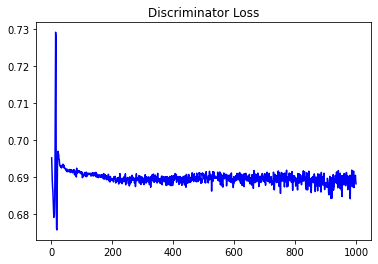

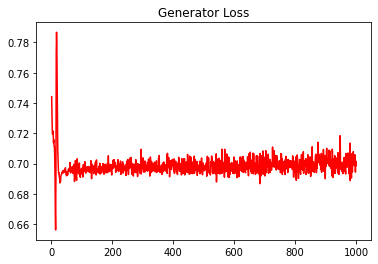

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1142335752520631


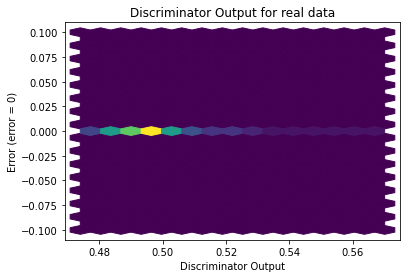

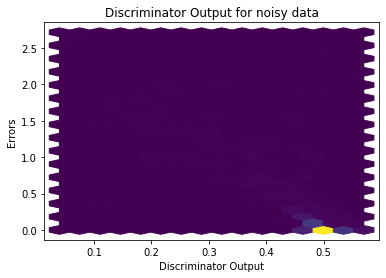

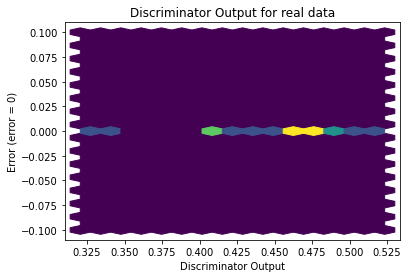

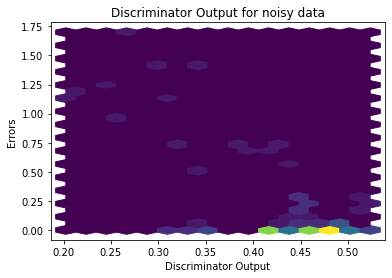

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


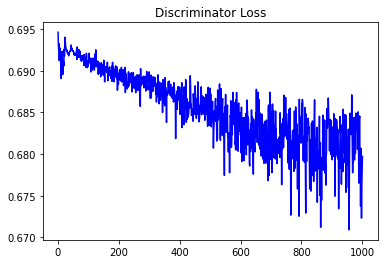

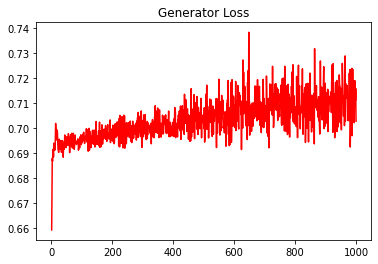

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1582089971549619


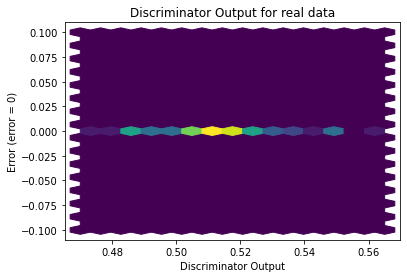

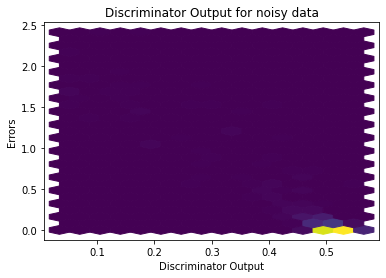

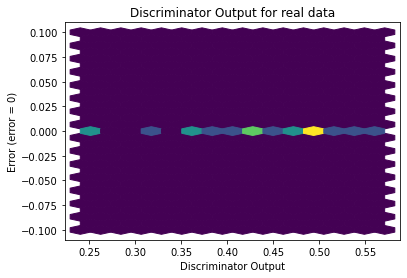

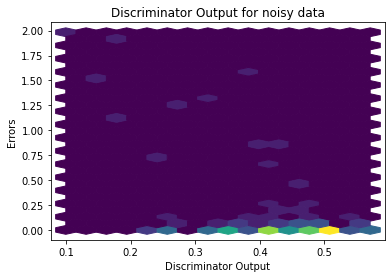

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4520]], requires_grad=True)
